# Predictive Short-Stay Vacation Homes Pricing: Unveiling the Factors That Influence Property Prices in Major Cities in Europe

### Objective :

The goal of this project is to develop a machine learning model that accurately predicts property prices in major cities. By analyzing a comprehensive dataset containing key features such as room type, cleanliness rating, guest satisfaction, distance from city center, and proximity to metro stations, the project will unveil the factors that significantly influence property prices. The model will enable property owners, real estate agents, and investors to make informed decisions about pricing, investment, and property management strategies.

## 1. Data Exploration and Cleaning

In [ ]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
#loading the Data set
bnbs_data = pd.read_csv("B&Bs_Data.csv", parse_dates=True)
#bnbs_data_df = bnbs_data.copy()
bnbs_data.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [ ]:
# Determining the no. of records in our dataset
bnbs_data.shape

(41714, 19)

In [ ]:
bnbs_data.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [ ]:
# Checking for nulls
bnbs_data.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

In [ ]:
# Dropping null records

bnbs_data.dropna(inplace = True)

bnbs_data.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

In [ ]:
bnbs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  int64  
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  int64  
 11  Guest Satisfaction           41714 non-null  int64  
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [ ]:
# Exploring the descriptive statistics of the variables
bnbs_data.describe(include='all')

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714,41714.000000,41714,41714,41714,41714,41714.000000,41714,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
unique,9,NaN,2,3,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Rome,NaN,Weekday,Entire home,False,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9027,NaN,20886,28264,41398,28580,NaN,30055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,260.094423,NaN,NaN,NaN,NaN,3.237235,NaN,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,NaN,279.408493,NaN,NaN,NaN,NaN,1.299459,NaN,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,NaN,34.779339,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,NaN,144.016085,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459575,11.132052
50%,NaN,203.819274,NaN,NaN,NaN,NaN,3.000000,NaN,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,NaN,297.373358,NaN,NaN,NaN,NaN,4.000000,NaN,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356


In [ ]:
# Checking for duplicates
bnbs_data[bnbs_data.duplicated()]

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index


In [ ]:
# Number of inputs per categorical columns

for col in bnbs_data.select_dtypes(include='object'):
  print(f"{col}:")
  print(bnbs_data[col].value_counts())
  print()


City:
City
Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: count, dtype: int64

Day:
Day
Weekday    20886
Weekend    20828
Name: count, dtype: int64

Room Type:
Room Type
Entire home     28264
Private room    13134
Shared room       316
Name: count, dtype: int64



In [ ]:
for col in bnbs_data.select_dtypes(include='bool'):
  print(f"{col}:")
  print(bnbs_data[col].value_counts())
  print()

Shared Room:
Shared Room
False    41398
True       316
Name: count, dtype: int64

Private Room:
Private Room
False    28580
True     13134
Name: count, dtype: int64

Superhost:
Superhost
False    30055
True     11659
Name: count, dtype: int64



## 2. Exploratory Data Analysis

In [ ]:
# Summary statistics for the Price column
bnbs_data['Price'].describe()

count    41714.000000
mean       260.094423
std        279.408493
min         34.779339
25%        144.016085
50%        203.819274
75%        297.373358
max      18545.450280
Name: Price, dtype: float64

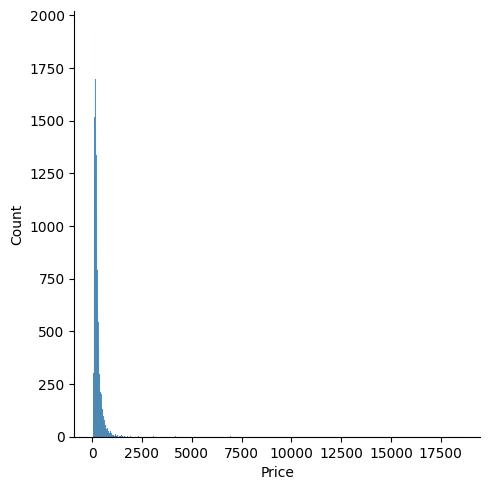

In [ ]:
# Density plot with regards to Price column
sns.displot(bnbs_data['Price'])
plt.show()



1. **Skewness**: The distribution of the `Price` column appears to be skewed to the right, indicating that there are more properties with lower prices compared to those with higher prices.
2. **Outliers**: There seem to be a few outliers with extremely high prices. These outliers can potentially affect the accuracy of the machine learning model if not addressed properly.
3. **Density**: The majority of the properties fall within the price range of 0 to 200. There is a significant drop in density beyond this range, suggesting that there are fewer properties available at higher price points.

Further analysis:

* Investigate the relationship between price and other features such as room type, cleanliness rating, and distance from the city center.
* Identify potential outliers and understand their characteristics.
* Consider transforming the price data to reduce skewness and improve the performance of the machine learning model.


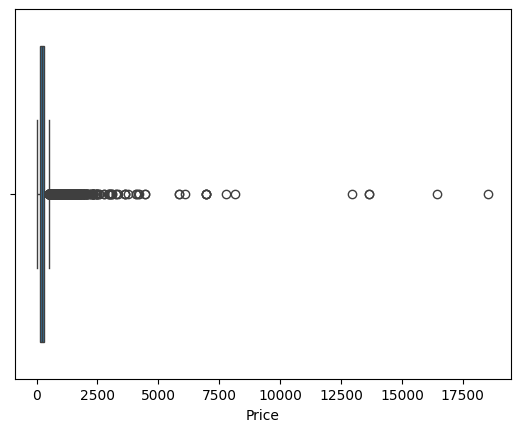

In [ ]:
# Box plot with regards to Price column
sns.boxplot(x = bnbs_data['Price'])
plt.show()


In [ ]:
bnbs_data[bnbs_data['Price'] > 1000]

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
7,Amsterdam,2771.307384,Weekday,Entire home,False,False,4,True,0,0,10,100,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219
8,Amsterdam,1001.804420,Weekday,Entire home,False,False,4,False,0,0,9,96,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686
28,Amsterdam,1032.971668,Weekday,Entire home,False,False,4,False,1,0,9,96,2,2.161608,1.424169,183.365259,9.709312,222.389689,15.496434
35,Amsterdam,1609.917278,Weekday,Entire home,False,False,6,False,1,0,10,96,3,2.988589,1.750003,207.952474,11.011222,241.778127,16.847448
58,Amsterdam,1044.688679,Weekday,Entire home,False,False,4,False,0,0,10,98,2,1.505924,0.175795,304.279396,16.111796,364.862825,25.424167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37016,Rome,2311.738714,Weekend,Private room,False,True,2,False,0,0,10,100,1,1.731672,1.054644,308.208799,6.828503,819.455388,17.853945
37046,Rome,1907.044163,Weekend,Entire home,False,False,5,False,1,0,6,60,3,2.978378,1.148510,710.405926,15.739358,1597.622769,34.808324
38222,Vienna,12942.991380,Weekday,Entire home,False,False,4,False,0,1,7,93,1,1.497979,0.396893,123.776241,8.864325,196.019793,4.685995
38387,Vienna,13664.305920,Weekday,Private room,False,True,2,False,0,0,9,87,1,2.239501,0.414395,128.349070,9.191812,201.545043,4.818080


## 3. Feature Engineering

In [ ]:
#One hot encoding columns 'City','Day','Room Type'

bnbs_data = pd.get_dummies(bnbs_data, columns=['City','Room Type'])
bnbs_data.head()


,Price,Day,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,...,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Room Type_Entire home,Room Type_Private room,Room Type_Shared room
0,194.033698,Weekday,False,True,2,False,1,0,10,93,...,False,False,False,False,False,False,False,False,True,False
1,344.245776,Weekday,False,True,4,False,0,0,8,85,...,False,False,False,False,False,False,False,False,True,False
2,264.101422,Weekday,False,True,2,False,0,1,9,87,...,False,False,False,False,False,False,False,False,True,False
3,433.529398,Weekday,False,True,4,False,0,1,9,90,...,False,False,False,False,False,False,False,False,True,False
4,485.552926,Weekday,False,True,2,True,0,0,10,98,...,False,False,False,False,False,False,False,False,True,False


In [ ]:

#Label encoding columns 'Shared Room', 'Day','Private room','Superhost'

# Creating a LabelEncoder object
le = LabelEncoder()

# Fitting the encoder to the data
le.fit(bnbs_data['Shared Room'])

# Transforming the data
bnbs_data['Shared Room'] = le.transform(bnbs_data['Shared Room'])

le.fit(bnbs_data['Day'])
bnbs_data['Day'] = le.transform(bnbs_data['Day'])

le.fit(bnbs_data['Private Room'])
bnbs_data['Private Room'] = le.transform(bnbs_data['Private Room'])

le.fit(bnbs_data['Superhost'])
bnbs_data['Superhost'] = le.transform(bnbs_data['Superhost'])

bnbs_data.head()



,Price,Day,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,...,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Room Type_Entire home,Room Type_Private room,Room Type_Shared room
0,194.033698,0,0,1,2,0,1,0,10,93,...,False,False,False,False,False,False,False,False,True,False
1,344.245776,0,0,1,4,0,0,0,8,85,...,False,False,False,False,False,False,False,False,True,False
2,264.101422,0,0,1,2,0,0,1,9,87,...,False,False,False,False,False,False,False,False,True,False
3,433.529398,0,0,1,4,0,0,1,9,90,...,False,False,False,False,False,False,False,False,True,False
4,485.552926,0,0,1,2,1,0,0,10,98,...,False,False,False,False,False,False,False,False,True,False


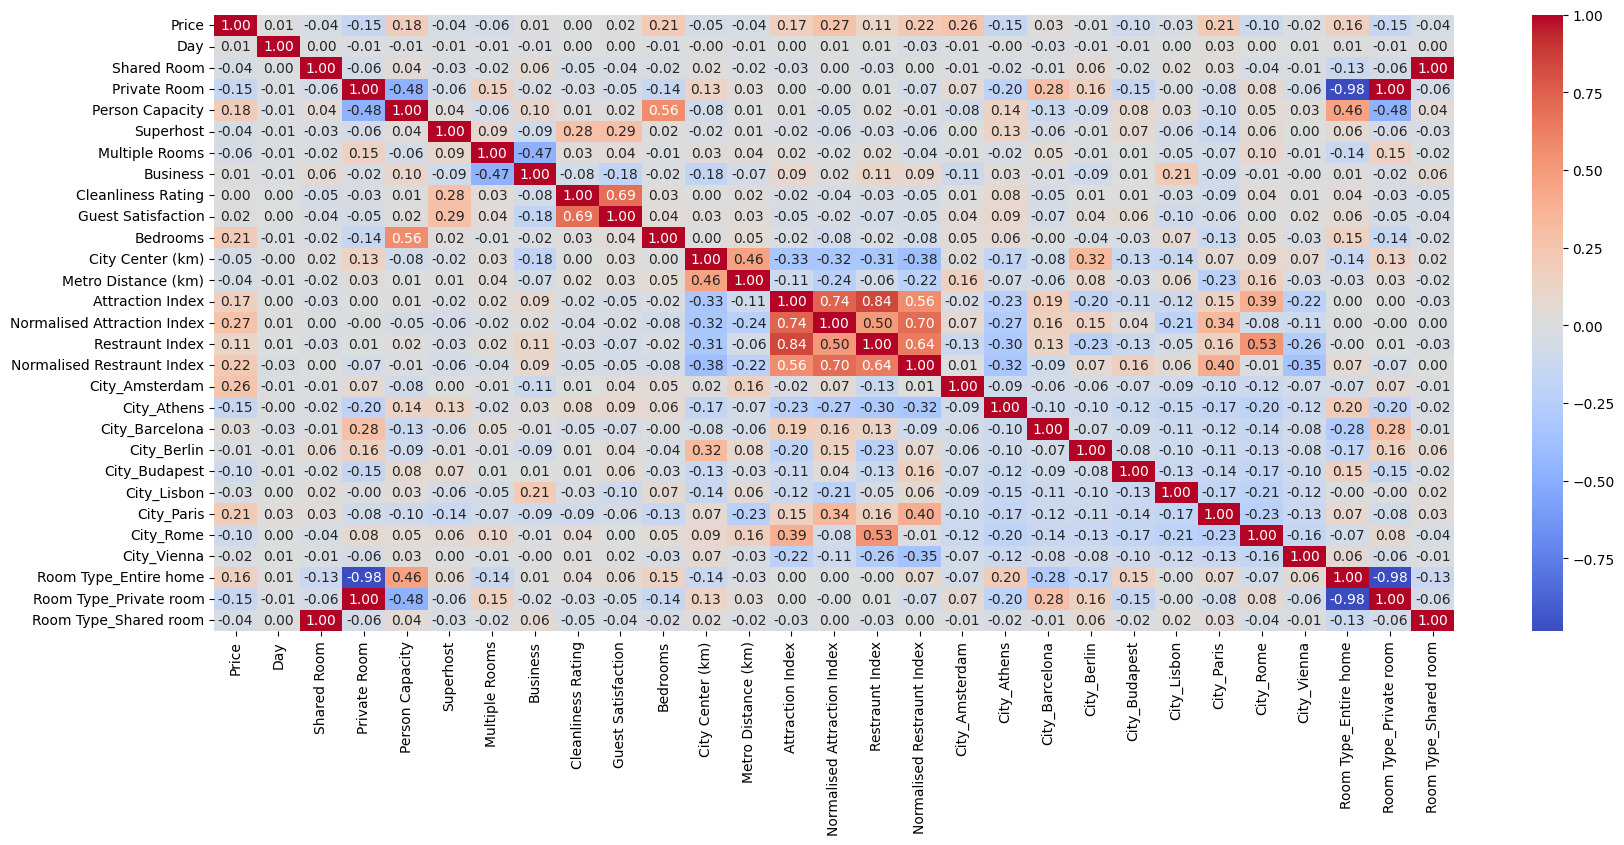

In [ ]:
#Heatmap showing correlation of features

# Calculating the correlation matrix
correlation_matrix = bnbs_data.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.show()


- **Room Type**: There appears to be a positive correlation between room type and price. This suggests that properties listed as "Entire home/apt" and "Private room" tend to have higher prices compared to those listed as "Shared room".
- **Day**: There is a slight positive correlation between day and price. This indicates that properties may be priced higher on certain days of the week or during specific seasons.
- **Shared Room**: There is a negative correlation between shared room and price. This suggests that properties listed as "Shared room" tend to have lower prices compared to those listed as "Entire home/apt" or "Private room".
- **Private Room**: There is a positive correlation between private room and price. This suggests that properties listed as "Private room" tend to have higher prices compared to those listed as "Shared room".
- **Superhost**: There is a slight positive correlation between superhost and price. This suggests that properties listed by superhosts may be priced slightly higher compared to those listed by non-superhosts.
- **Distance from City Center**: There appears to be a negative correlation between distance from city center and price. This suggests that properties located closer to the city center tend to have higher prices compared to those located further away.
- **Distance from Metro Station**: There is a slight negative correlation between distance from metro station and price. This suggests that properties located closer to metro stations may have slightly higher prices compared to those located further away.
- **Cleanliness Rating**: There is a positive correlation between cleanliness rating and price. This suggests that properties with higher cleanliness ratings tend to have higher prices compared to those with lower cleanliness ratings.
- **Guest Satisfaction**: There is a positive correlation between guest satisfaction and price. This suggests that properties with higher guest satisfaction ratings tend to have higher prices compared to those with lower guest satisfaction ratings.

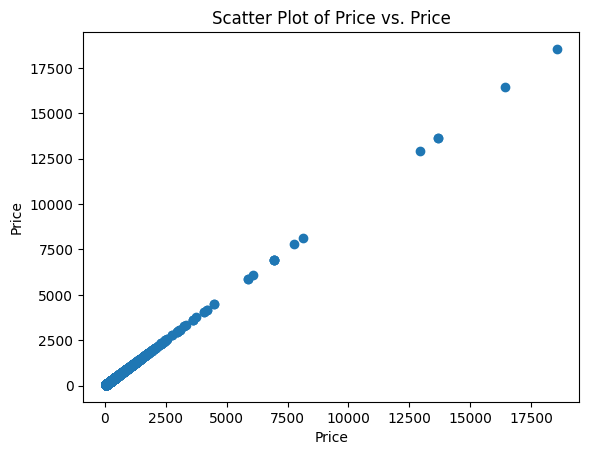

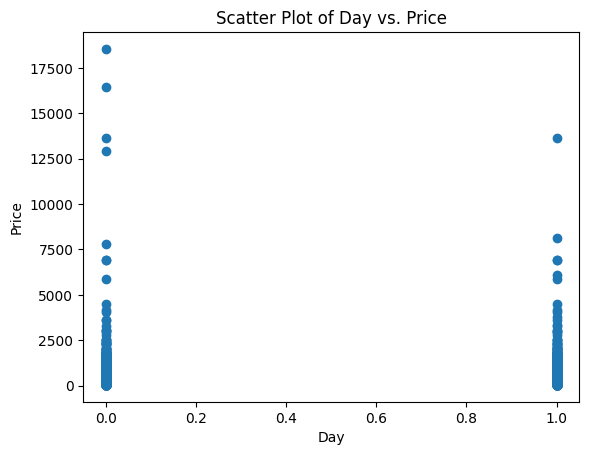

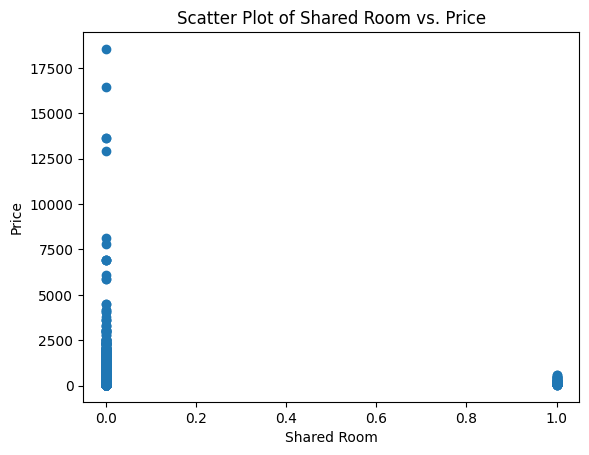

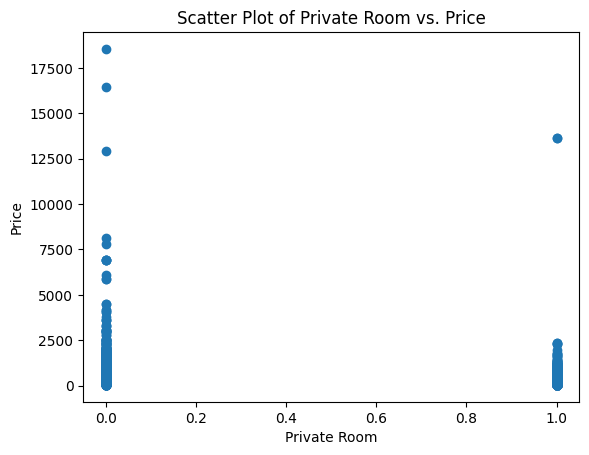

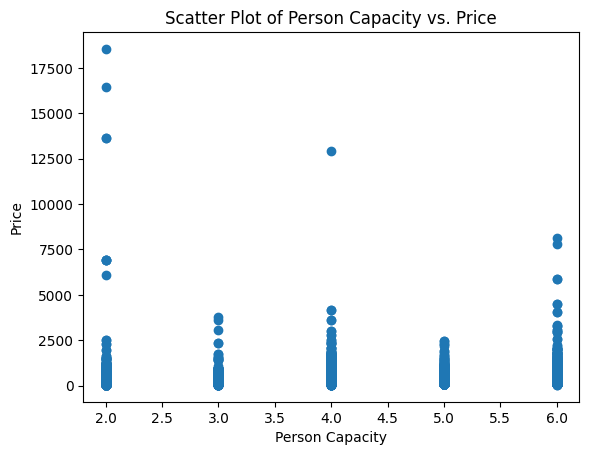

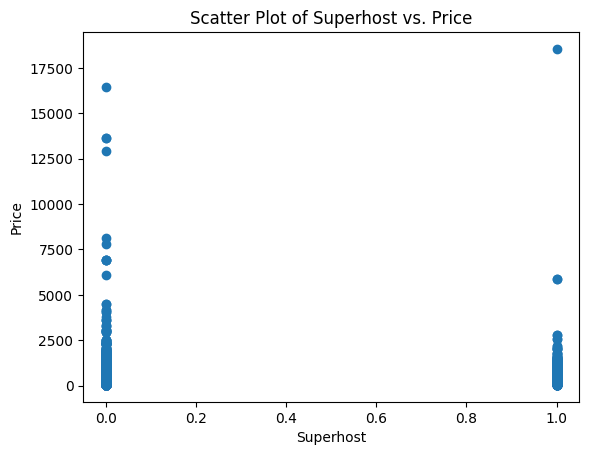

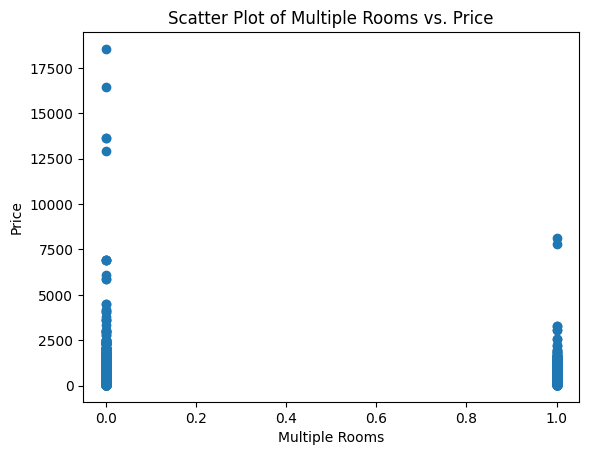

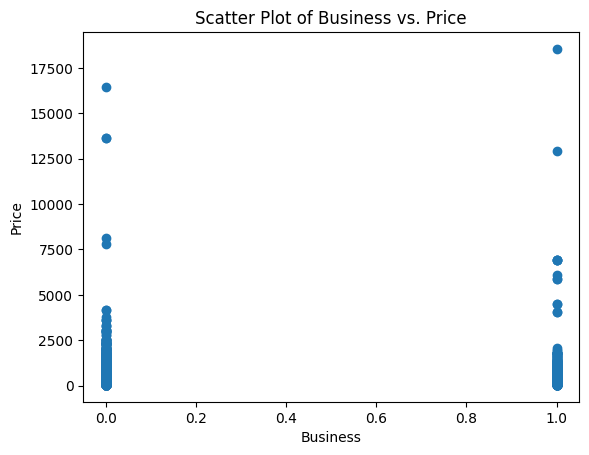

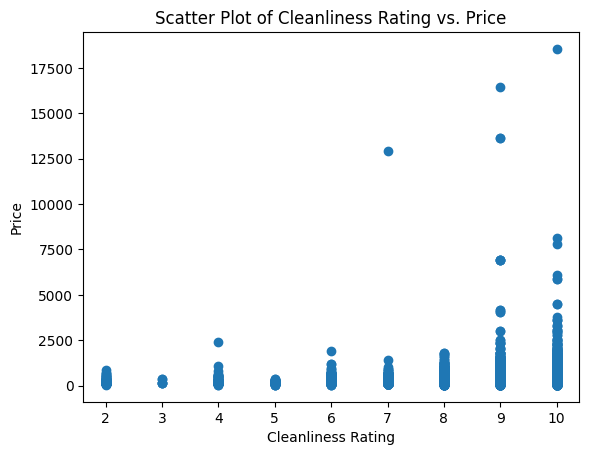

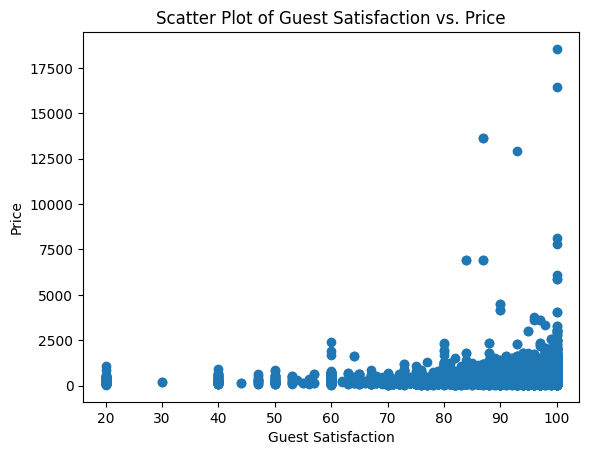

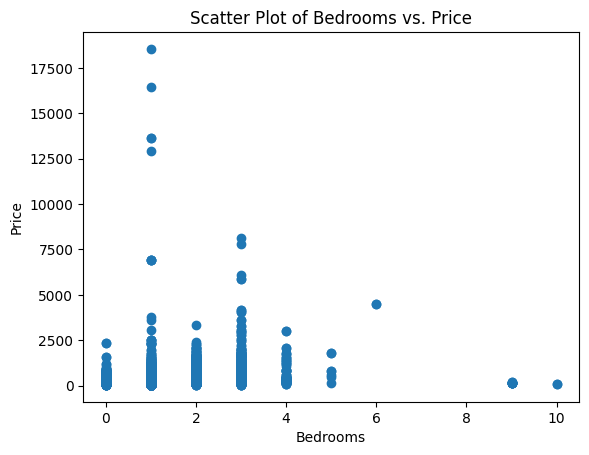

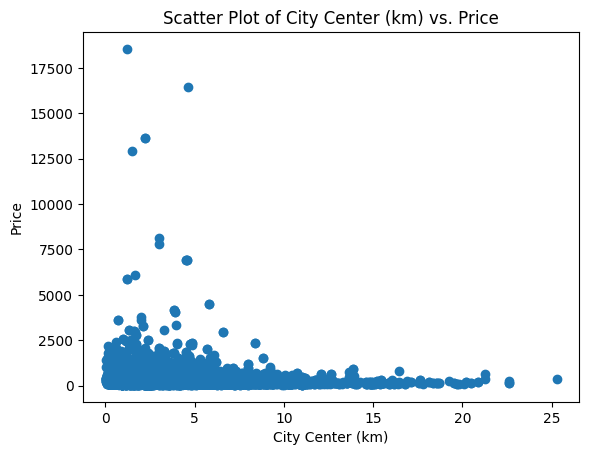

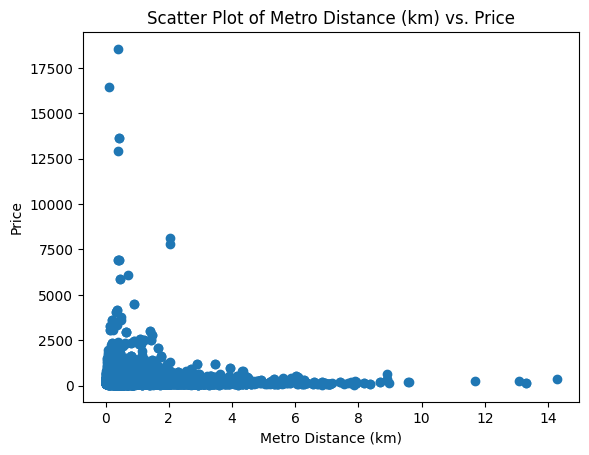

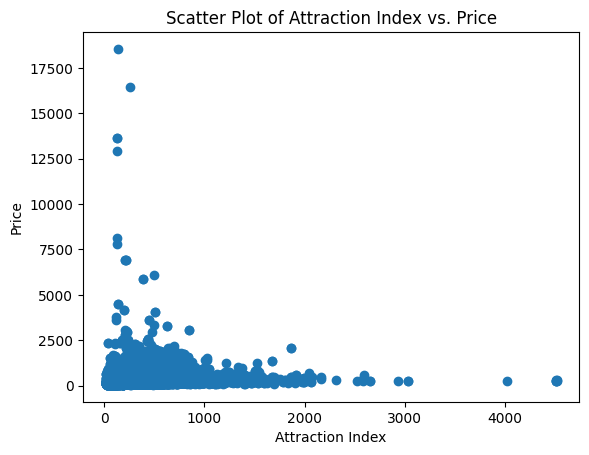

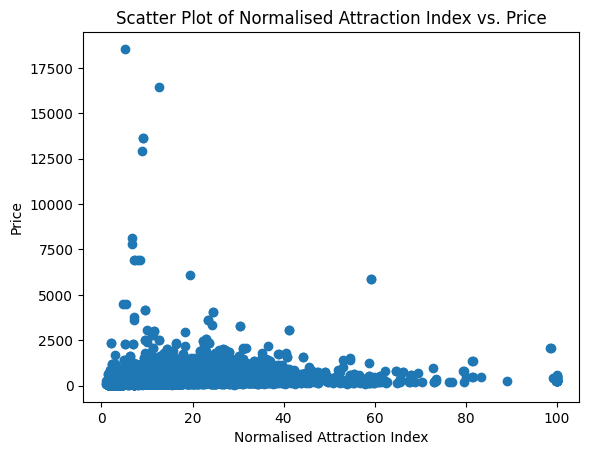

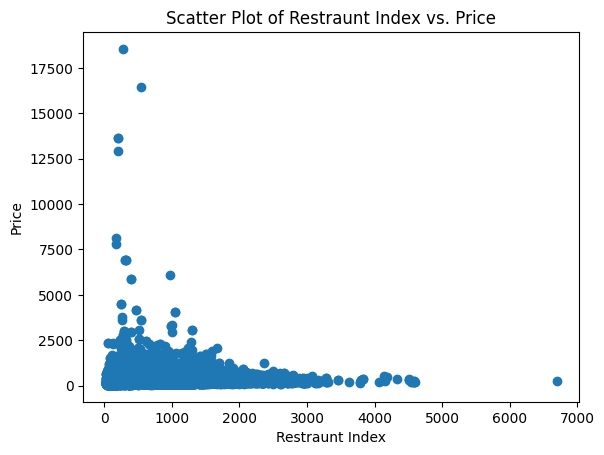

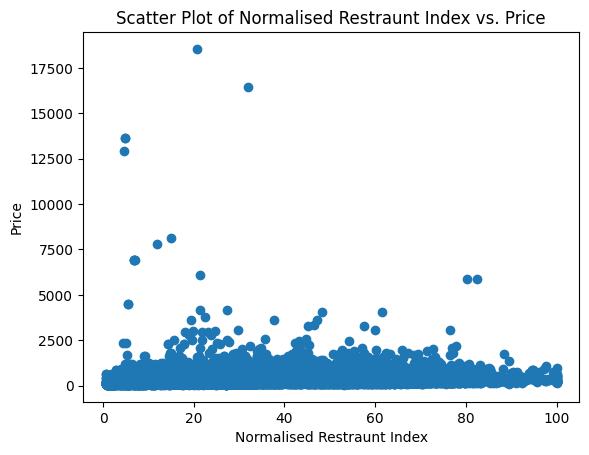

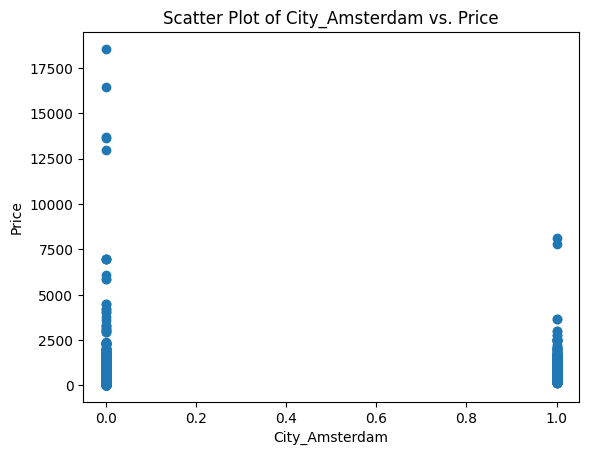

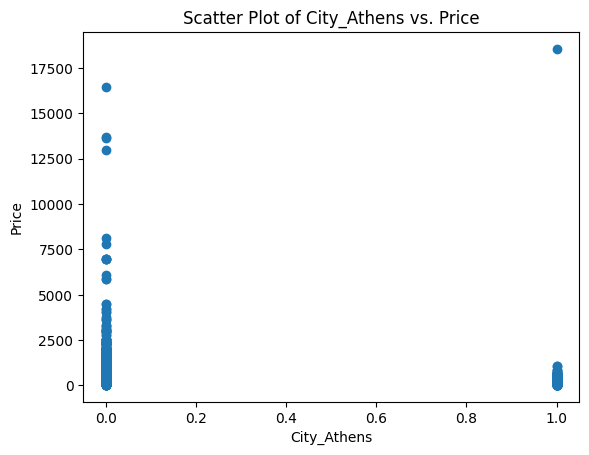

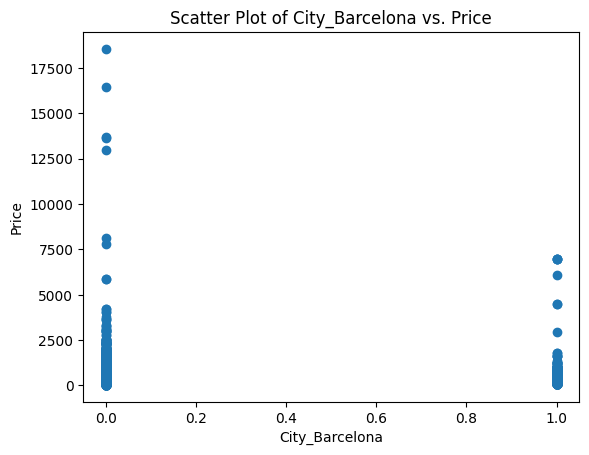

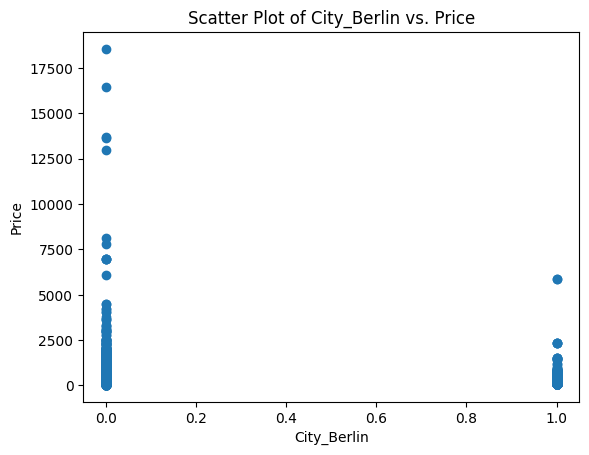

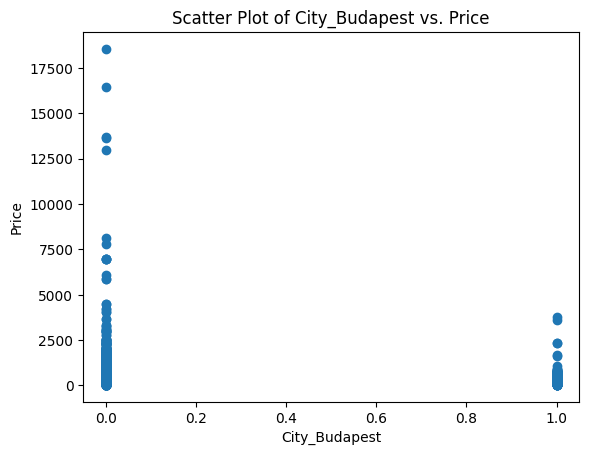

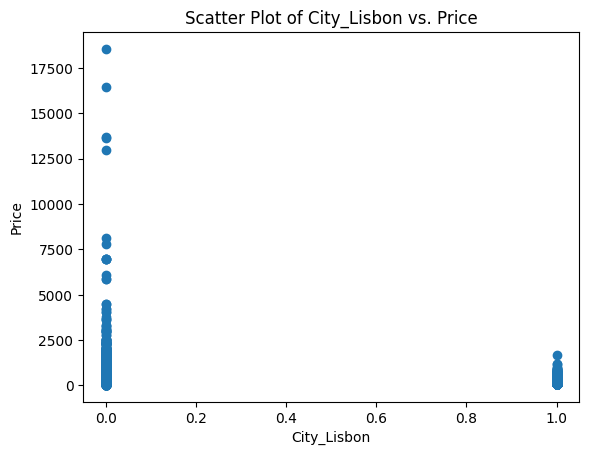

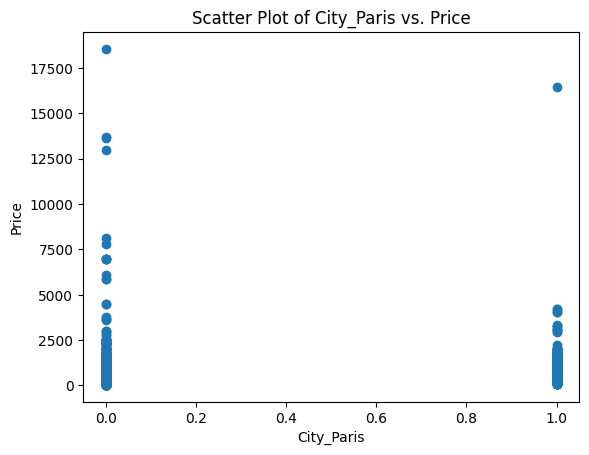

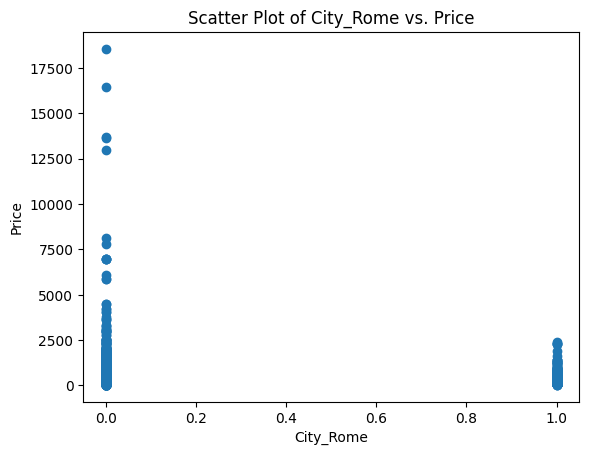

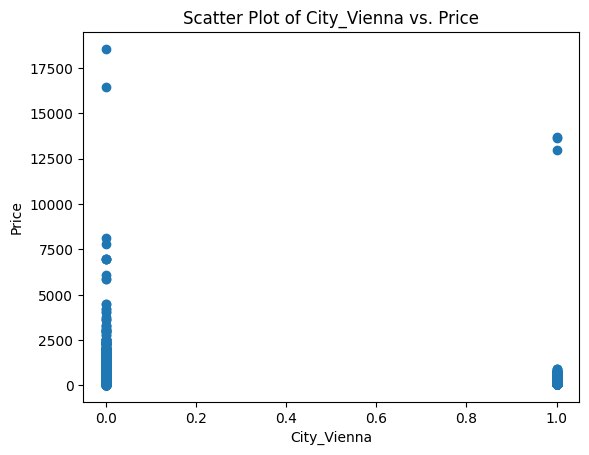

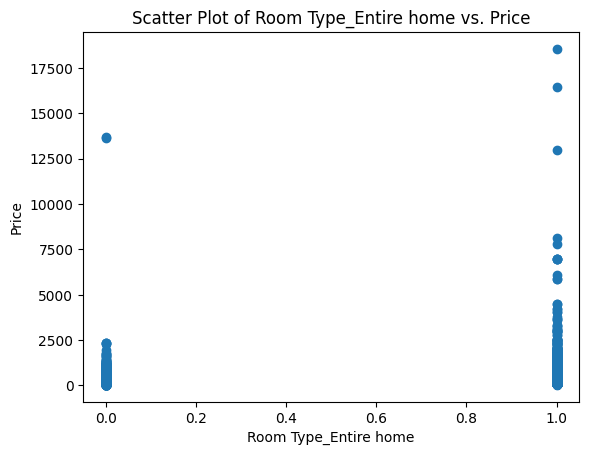

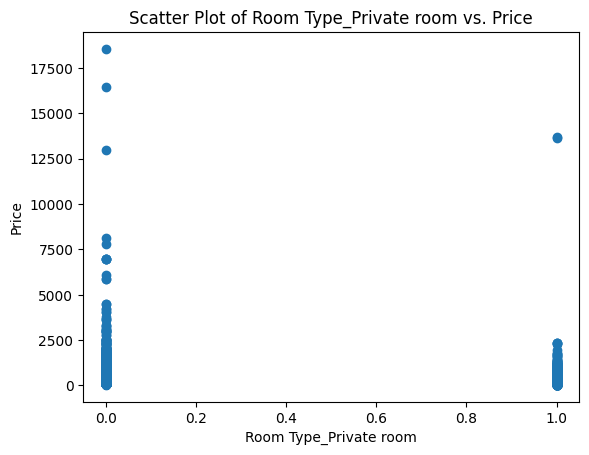

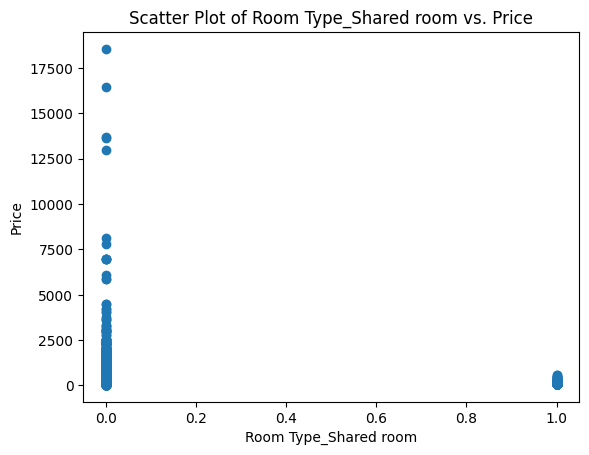

In [ ]:
# Scatter plots showing each column against price

for col in bnbs_data : #.select_dtypes(include=['int64', 'float64']):
    plt.figure()
    plt.scatter(bnbs_data[col], bnbs_data['Price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of {col} vs. Price')
    plt.show()


- **Location**: Properties located closer to the city center and metro stations tend to have higher prices. This suggests that proximity to amenities and transportation hubs is a key factor influencing property prices.


- **Property Type**: Entire homes/apartments and private rooms command higher prices compared to shared rooms. This indicates that guests are willing to pay more for privacy and exclusive use of the property.

- **Host Factors**: Properties listed by superhosts and with higher cleanliness and guest satisfaction ratings tend to have higher prices. This suggests that the reputation and quality of the host and property play a significant role in determining the price.


- **Seasonality**: There is a slight positive correlation between day and price, suggesting that properties may be priced higher on certain days of the week or during specific seasons.


- **Outliers**: There are  outliers with extremely high prices and should be investigated further.


In [ ]:
print(bnbs_data.columns)

Index(['Price', 'Day', 'Shared Room', 'Private Room', 'Person Capacity',
       'Superhost', 'Multiple Rooms', 'Business', 'Cleanliness Rating',
       'Guest Satisfaction', 'Bedrooms', 'City Center (km)',
       'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index', 'City_Amsterdam', 'City_Athens',
       'City_Barcelona', 'City_Berlin', 'City_Budapest', 'City_Lisbon',
       'City_Paris', 'City_Rome', 'City_Vienna', 'Room Type_Entire home',
       'Room Type_Private room', 'Room Type_Shared room'],
      dtype='object')


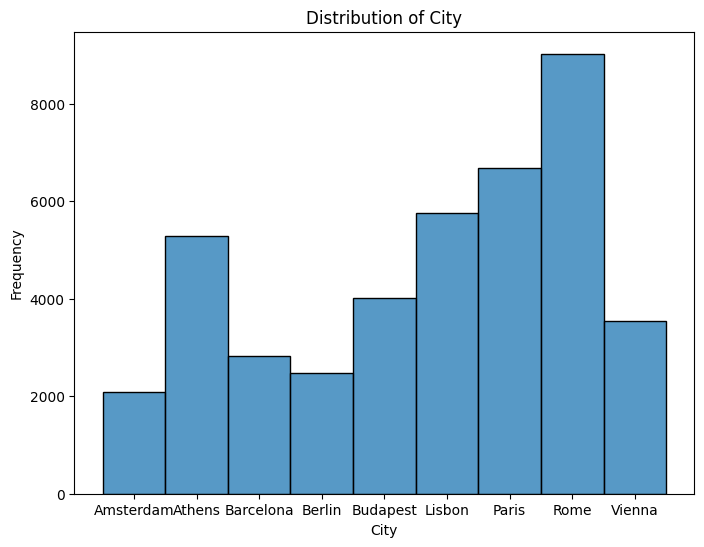

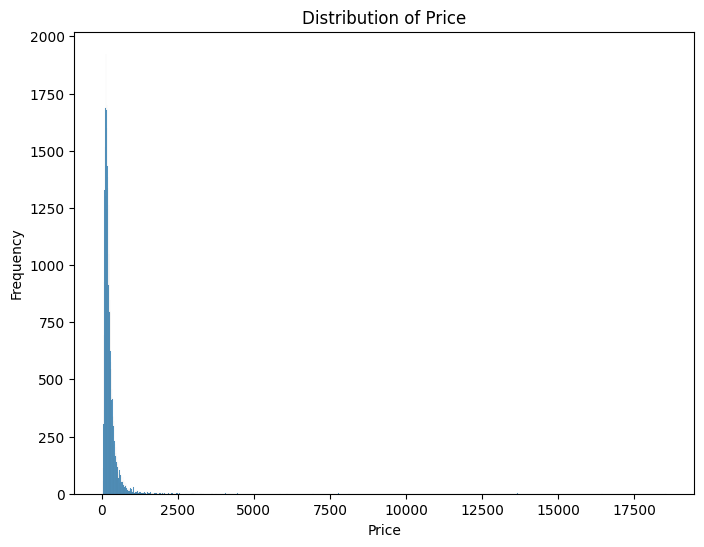

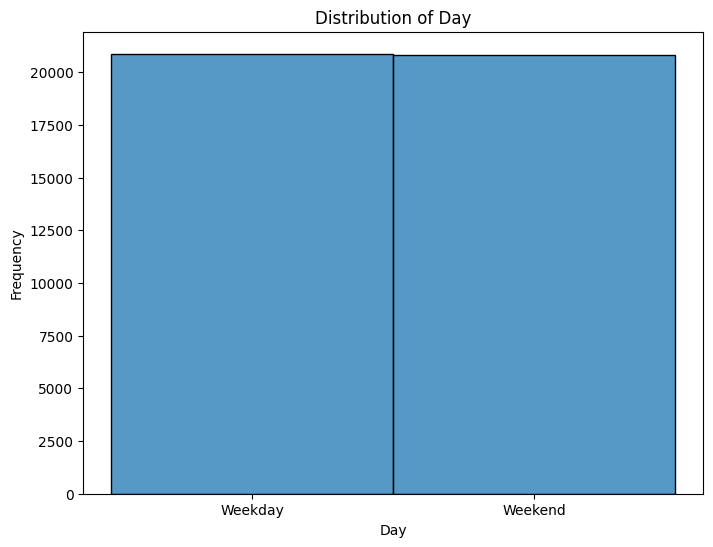

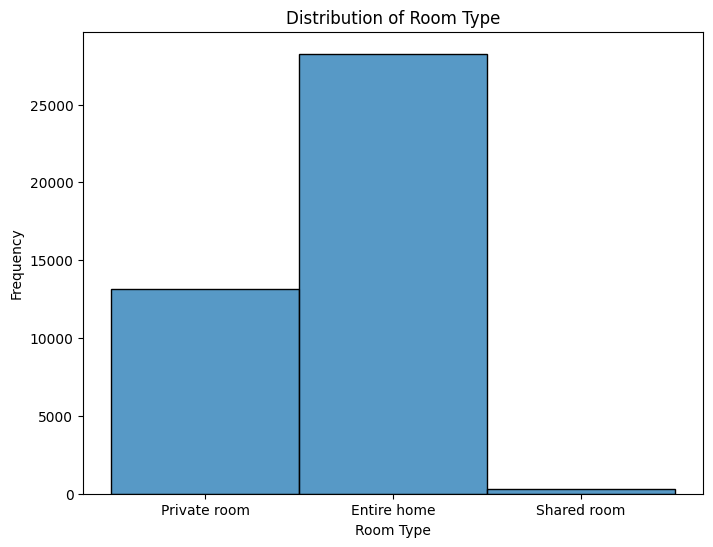

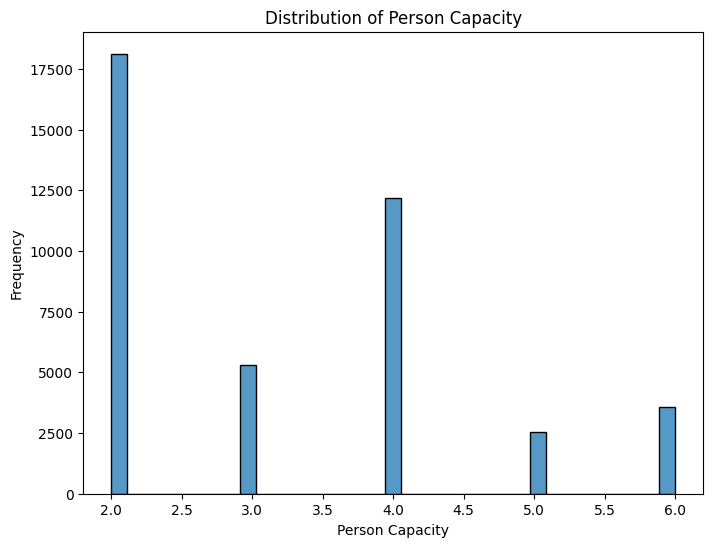

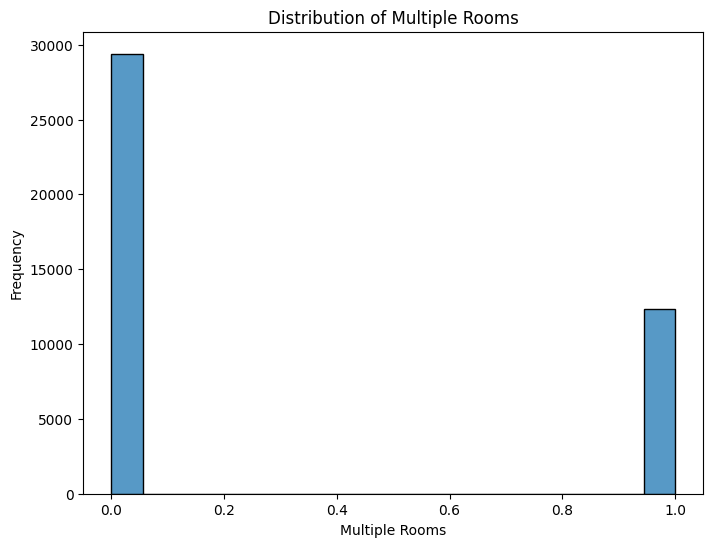

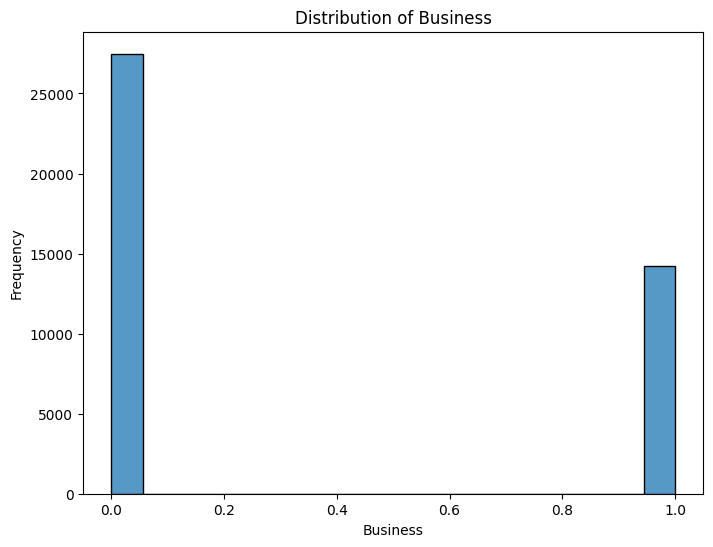

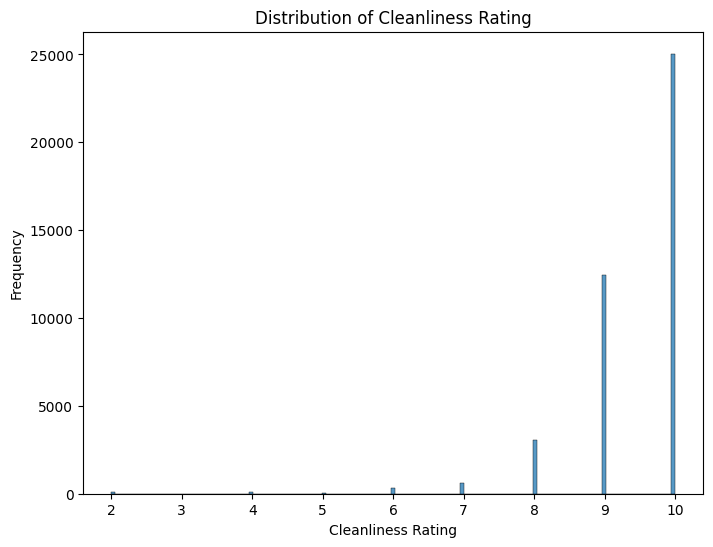

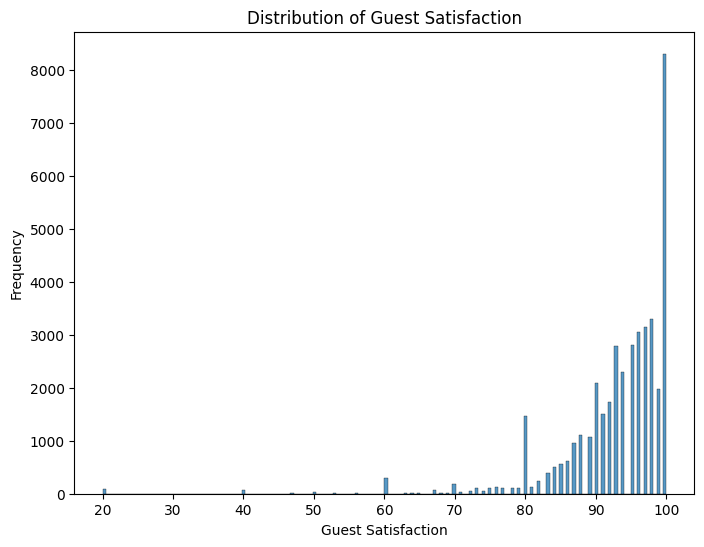

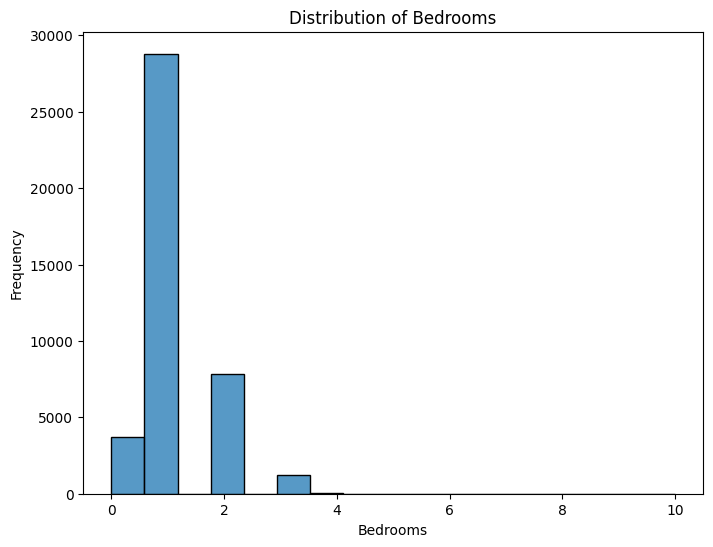

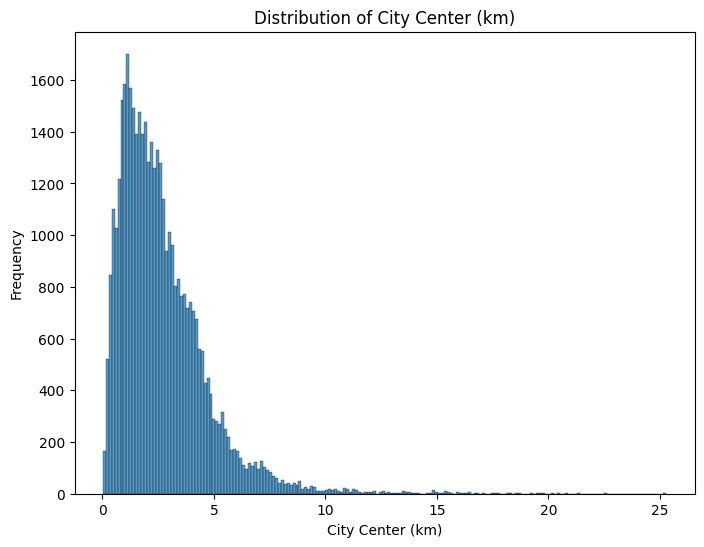

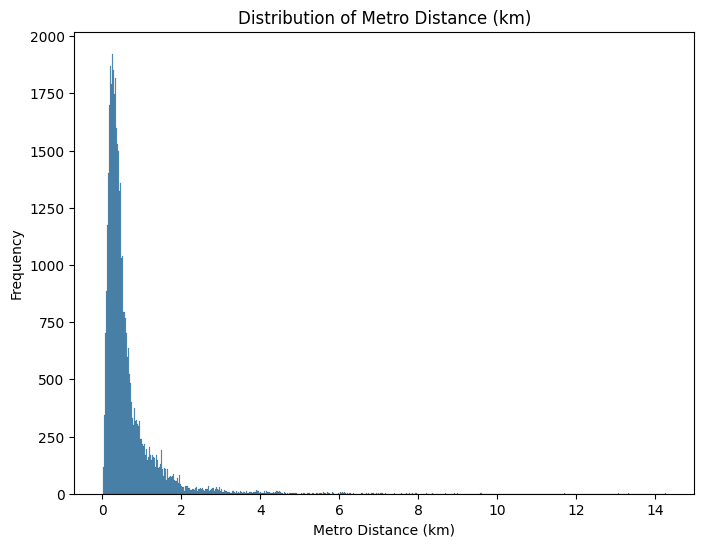

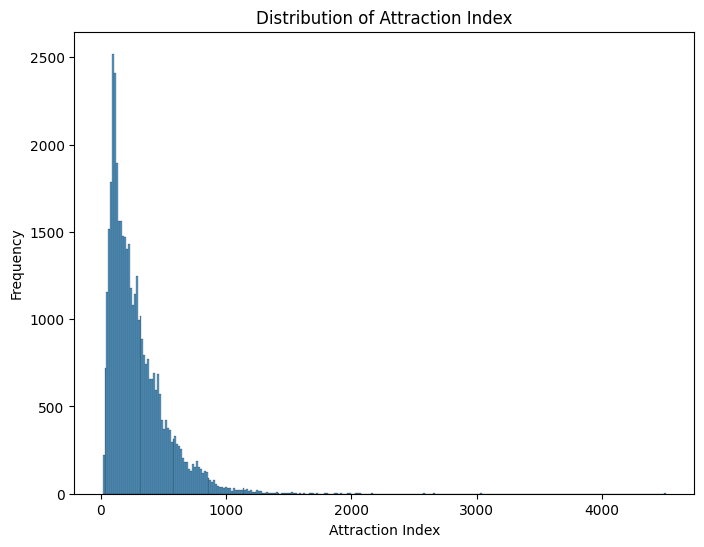

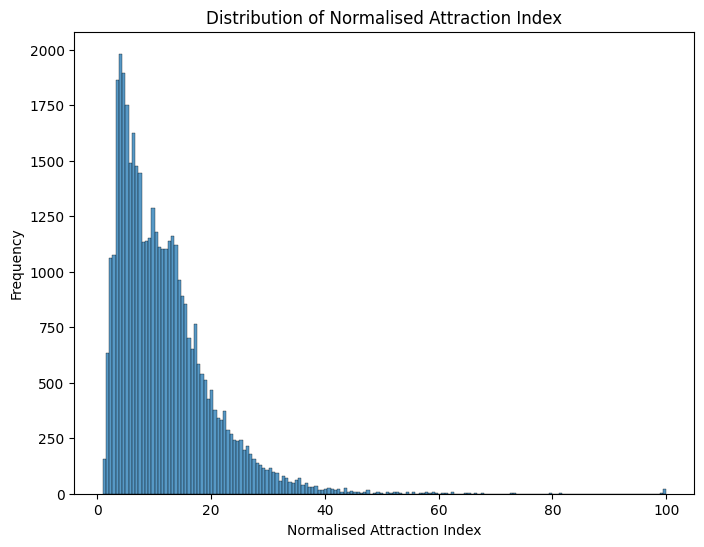

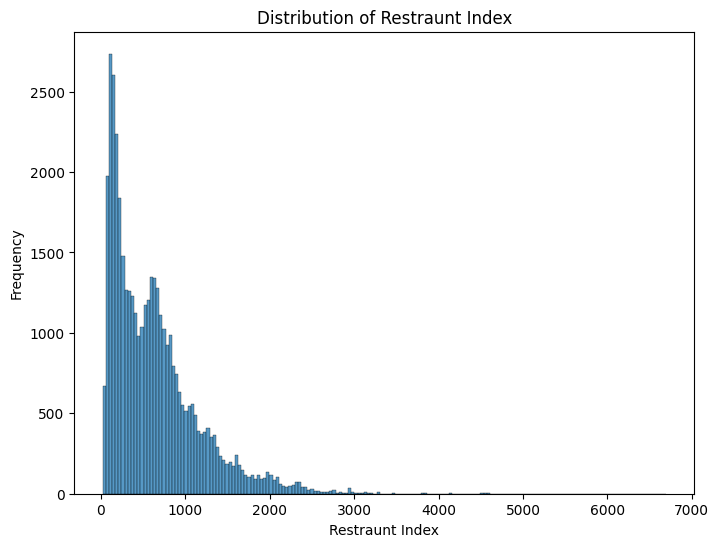

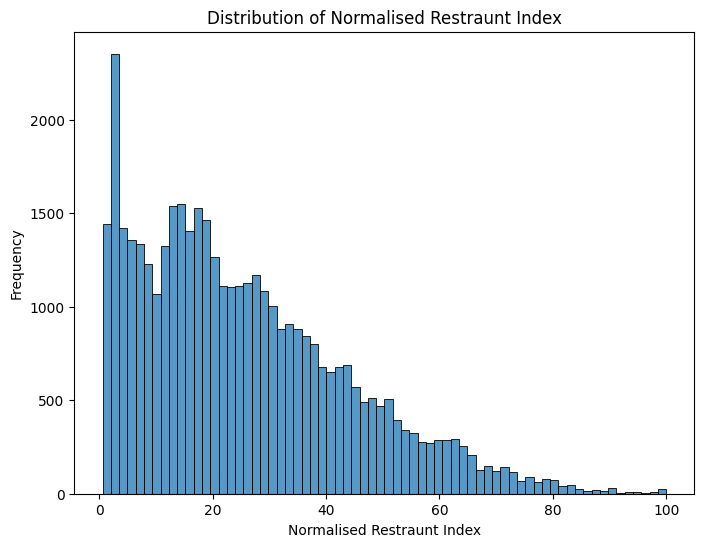

In [ ]:
# Distribution plots for each feature

from scipy import stats

# Re-Loading the data
bnbs_data = pd.read_csv("B&Bs_Data.csv", parse_dates=True)

# Iterating through each column and plot its distribution
for col in bnbs_data.select_dtypes(exclude='bool').columns:
  plt.figure(figsize = (8,6))
  sns.histplot(bnbs_data[col])
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {col}")
  plt.show()


### Observations:

- **Price**: The distribution of prices is skewed to the right, indicating that there are more properties with lower prices compared to those with higher prices.
- **Shared Room**: The distribution of the `Shared Room` column is skewed to the left, indicating that the majority of properties are not shared rooms.
- **Private Room**: The distribution of the `Private Room` column is skewed to the right, indicating that the majority of properties are private rooms.
- **Superhost**: The distribution of the `Superhost` column is skewed to the left, indicating that the majority of properties are not listed by superhosts.
- **Distance from Metro Station**: The distribution of distance from metro station is skewed to the right, indicating that most properties are located further away from metro stations.
- **Person Capacity**: The distribution of person capacity is right-skewed, indicating that there are more properties with lower person capacities compared to those with higher capacities.
- **Cleanliness Rating**: The distribution of cleanliness rating is skewed to the left, indicating that most properties have high cleanliness ratings.
- **Guest Satisfaction**: The distribution of guest satisfaction is skewed to the left, indicating that most properties have high guest satisfaction ratings.

###Insights:
- **Pricing:** The majority of properties in the dataset are priced below 200, with a significant drop in density beyond this range. This suggests that there is a higher demand for lower-priced properties.
- **Location:** Most properties are located within a certain distance from the city center and metro stations, indicating that proximity to amenities and transportation hubs is a key factor in determining property prices.
- **Quality:** The high cleanliness and guest satisfaction ratings suggest that most properties in the dataset are well-maintained and offer a positive guest experience. This could be a contributing factor to the higher prices observed for these properties.


## 4.Model Training and Evaluation


In [ ]:
bnbs_data.dropna(inplace = True)

In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X = bnbs_data.drop('Price', axis=1)
y = bnbs_data['Price']


le = LabelEncoder()
for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Training the Linear Regression model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 84193.17
MAE: 104.71
R2 Score: 0.12


In [ ]:
# Training the Lasso Regression model

from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 84193.17
MAE: 104.71
R2 Score: 0.12


In [ ]:
# Training the Ridge Regression model
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 84193.17
MAE: 104.71
R2 Score: 0.12


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Creating a decision tree regressor object
dt_model = DecisionTreeRegressor()

# Fitting the model to the training data
dt_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 93624.81
MAE: 60.99
R2 Score: 0.02


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor object
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 65983.19
MAE: 56.08
R2 Score: 0.31


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor object
gb_model = GradientBoostingRegressor()

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 71538.12
MAE: 72.61
R2 Score: 0.25


In [ ]:
from sklearn.svm import SVR

# Create a support vector regressor object
svr_model = SVR()

# Fit the model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 87216.25
MAE: 91.52
R2 Score: 0.09


In [ ]:

# Import the XGBRegressor model
from xgboost import XGBRegressor

# Create an XGBRegressor object
xgb_model = XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 73058.03
MAE: 66.06
R2 Score: 0.24


**Insights on the Performance of the Different Models:**

- **Linear Regression Models (LinearRegression, Ridge, Lasso, ElasticNet):**

These models have similar performance metrics (MSE, MAE, R2 score), suggesting that regularization techniques (Ridge, Lasso, ElasticNet) do not significantly improve performance compared to the basic LinearRegression model.
The R2 score for these models is quite low (around 0.12), indicating that they explain only a small portion of the variance in the target variable.
Linear regression assumes a linear relationship between the features and the target variable, which may not be sufficient to capture the complex relationships in the data.

- **Tree-Based Models (DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor):**

RandomForestRegressor and XGBRegressor outperform other models in terms of predictive performance, with lower MSE, lower MAE, and higher R2 score.
DecisionTreeRegressor performs poorly compared to other models, indicating that a single decision tree is not suitable for this regression task.
GradientBoostingRegressor performs well but not as well as RandomForestRegressor and XGBRegressor. It still outperforms linear regression models and DecisionTreeRegressor.
Tree-based models can capture non-linear relationships between the features and the target variable, making them more suitable for complex datasets like this one.

- **Support Vector Regression (SVR):**

SVR performs similarly to linear regression models in terms of MSE, MAE, and R2 score. It does not outperform tree-based models.
SVR may not be well-suited for this dataset, as it assumes a linear relationship between the features and the target variable.

## 5. Model Optimization

### Random Forest Regressor

In [ ]:
''' columns_to_drop = ['Shared Room', 'Private Room', 'Superhost', 'Metro Distance (km)', 'Multiple Rooms', 'Restraunt Index', 'Business', 'Guest Satisfaction', 'Attraction Index']

bnbs_data_optm = pd.read_csv("B&Bs_Data.csv", parse_dates=True)
#bnbs_data_optm = bnbs_data.drop(columns = columns_to_drop, inplace=True)
bnbs_data_optm.dropna(inplace = True)
bnbs_data_optm '''

' columns_to_drop = [\'Shared Room\', \'Private Room\', \'Superhost\', \'Metro Distance (km)\', \'Multiple Rooms\', \'Restraunt Index\', \'Business\', \'Guest Satisfaction\', \'Attraction Index\']\n\nbnbs_data_optm = pd.read_csv("B&Bs_Data.csv", parse_dates=True)\n#bnbs_data_optm = bnbs_data.drop(columns = columns_to_drop, inplace=True)\nbnbs_data_optm.dropna(inplace = True)\nbnbs_data_optm '

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor object
rf = RandomForestRegressor()

# Create an RFE object and specify the number of features to select
rfe = RFE(rf, n_features_to_select=7)

# Fit the RFE object to the training data
rfe.fit(X_train_optm, y_train_optm)

# Get the indices of the selected features
selected_features = rfe.support_

# Get the names of the selected features
X_train_sel = X_train_optm.columns[selected_features]

X_train_sel

#X_train_optm = pd.DataFrame(X_train_optm)
#selected_feature_names = X_train_optm.columns[selected_features]

# Print the selected feature names
#print("Selected Features:")
#print(selected_feature_names)


Index([0, 11, 12, 14, 15, 16, 17], dtype='int64')

In [ ]:
bnbs_data_optm = pd.read_csv("B&Bs_Data.csv", parse_dates=True)

# Separating features and target variable
X_optm = bnbs_data_optm.drop('Price', axis=1)
y_optm = bnbs_data_optm['Price']

# Encoding categorical features using LabelEncoder
le = LabelEncoder()
for col in X_optm.select_dtypes(include='object'):
    X_optm[col] = le.fit_transform(X_optm[col])


# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_optm, X_test_optm, y_train_optm, y_test_optm = train_test_split(X_optm, y_optm, test_size=0.3, random_state=42)
X_val_optm, X_test_optm, y_val_optm, y_test_optm = train_test_split(X_temp_optm, y_temp_optm, test_size=0.5, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_optm = scaler.fit_transform(X_train_optm)
X_test_optm = scaler.transform(X_test_optm)

In [ ]:
X_train_sel

Index([0, 11, 12, 14, 15, 16, 17], dtype='int64')

In [ ]:

# Extract the features and target variable from the validation set
X_train_sel = bnbs_data_optm[selected_feature_names]
y_val = bnbs_data_optm['Price']

# Train a Random Forest Regressor using only the selected features
rf_model = RandomForestRegressor()
rf_model.fit(X_train_sel, y_train_optm)

# Evaluate the model on the validation set

y_pred_val = rf_model.predict(X_val[selected_feature_names])
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

# Evaluate the model on the test set
y_pred_test = rf_model.predict(X_test_optm[selected_feature_names])
mse_test = mean_squared_error(y_test_optm, y_pred_test)
mae_test = mean_absolute_error(y_test_optm, y_pred_test)
r2_test = r2_score(y_test_optm, y_pred_test)

# Print the evaluation metrics
print("Validation Set:")
print(f"MSE: {mse_val:.2f}")
print(f"MAE: {mae_val:.2f}")
print(f"R2 Score: {r2_val:.2f}")

print("Test Set:")
print(f"MSE: {mse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R2 Score: {r2_test:.2f}")


KeyError: "None of [Index([0, 11, 12, 14, 15, 16, 17], dtype='int64')] are in the [columns]"

In [ ]:
'''

# Split the data into training, validation, and test sets
X_train_optm, X_temp_optm, y_train_optm, y_temp_optm = train_test_split(X_optm, y_optm, test_size=0.3, random_state=42)
X_val_optm, X_test_optm, y_val_optm, y_test_optm = train_test_split(X_temp_optm, y_temp_optm, test_size=0.5, random_state=42)

# Train a Random Forest Regressor model
rf_model_optm = RandomForestRegressor()
rf_model_optm.fit(X_train_optm, y_train_optm)

# Evaluate the model on the validation set
y_pred_val_optm = rf_model_optm.predict(X_val_optm)
mse_val_optm = mean_squared_error(y_val_optm, y_pred_val_optm)
mae_val_optm = mean_absolute_error(y_val_optm, y_pred_val_optm)
r2_val_optm = r2_score(y_val_optm, y_pred_val_optm)

print(f"Validation MSE: {mse_val_optm:.2f}")
print(f"Validation MAE: {mae_val_optm:.2f}")
print(f"Validation R2 Score: {r2_val_optm:.2f}")

# Evaluate the model on the test set
y_pred_test_optm = rf_model_optm.predict(X_test_optm)
mse_test_optm = mean_squared_error(y_test_optm, y_pred_test_optm)
mae_test_optm = mean_absolute_error(y_test_optm, y_pred_test_optm)
r2_test_optm = r2_score(y_test_optm, y_pred_test_optm)

print(f"Test MSE: {mse_test_optm:.2f}")
print(f"Test MAE: {mae_test_optm:.2f}")
print(f"Test R2 Score: {r2_test_optm:.2f}")
 '''

Validation MSE: 87343.95
Validation MAE: 57.00
Validation R2 Score: 0.28
Test MSE: 41484.08
Test MAE: 53.57
Test R2 Score: 0.41


In [ ]:

# Hyperparameter tuning for RandomForestRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Defining the parameter grid
param_grid = {
    'n_estimators': [3, 5, 7, 10],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating the RandomForestRegressor instance
rf_model = RandomForestRegressor(random_state=42)

# Performing grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train_optm, y_train_optm)

# Getting the best model
best_rf_model = grid_search.best_estimator_

# Evaluating the best model on the test set
y_pred_best_rf = best_rf_model.predict(X_test_optm)
mse_best_rf = mean_squared_error(y_test_optm, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test_optm, y_pred_best_rf)
r2_best_rf = r2_score(y_test_optm, y_pred_best_rf)

print(f"Best RandomForestRegressor Model:")
print(f"MSE: {mse_best_rf:.2f}")
print(f"MAE: {mae_best_rf:.2f}")
print(f"R2 Score: {r2_best_rf:.2f}")


Best RandomForestRegressor Model:
MSE: 45789.12
MAE: 68.11
R2 Score: 0.35
